<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


## Images

In [3]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

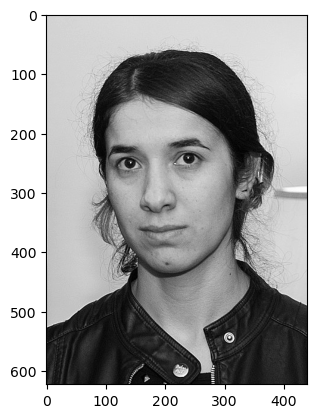

In [5]:
plt.imshow(nadia,cmap='gray')

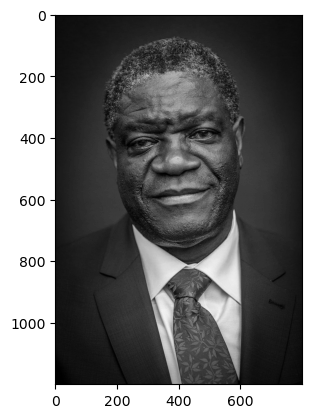

In [7]:
plt.imshow(denis,cmap='gray')

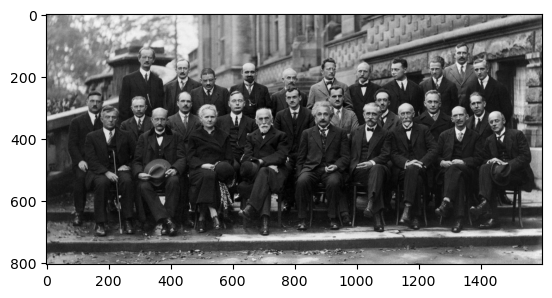

In [9]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [11]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [15]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [17]:
result = detect_face(denis)

[[131 187 515 515]]


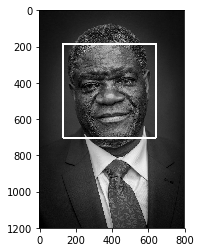

In [9]:
plt.imshow(result,cmap='gray')

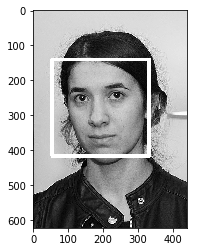

In [10]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

[[ 430  318   34   34]
 [ 912  245   55   55]
 [ 766  248   57   57]
 [ 586  256   63   63]
 [1058  257   56   56]
 [1315  107   51   51]
 [1300  303   62   62]
 [ 182  312   55   55]
 [ 498  308   61   61]
 [ 300  121   52   52]
 [ 668  310   70   70]
 [ 336  317   62   62]
 [ 269  250   61   61]
 [ 131  261   55   55]
 [1419  324   57   57]
 [ 421  259   59   59]
 [1216  258   65   65]
 [1320  375   32   32]
 [1360  266   57   57]
 [ 272  277   57   57]
 [ 673  363   63   63]
 [ 413  155   54   54]
 [1371  157   56   56]
 [1231  160   46   46]
 [ 896  158   51   51]
 [ 994  165   53   53]
 [ 629  166   57   57]
 [1101  161   51   51]
 [1130  295   64   64]
 [ 843   58   28   28]
 [ 766  186   53   53]
 [1020  301   58   58]
 [ 863  301   60   60]
 [ 496  194   55   55]]


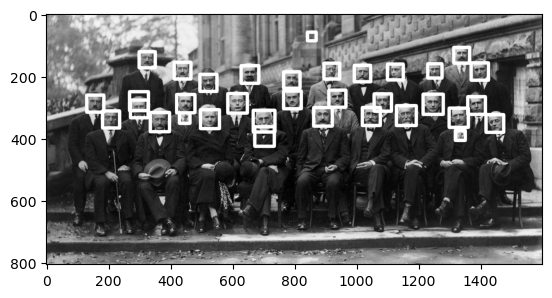

In [19]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [12]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

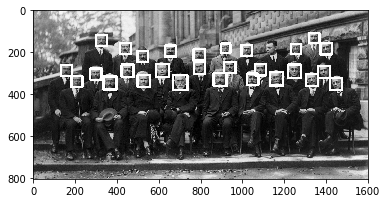

In [13]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [21]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [35]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

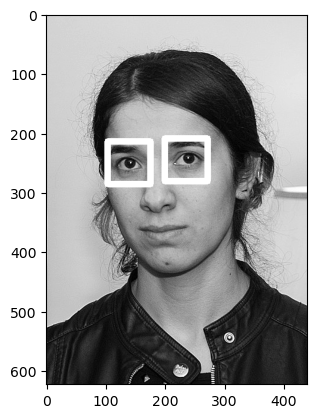

In [37]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [39]:
eyes = eye_cascade.detectMultiScale(denis) 

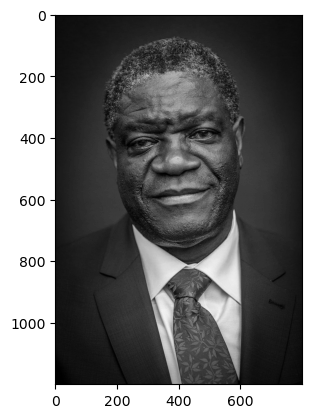

In [41]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

In [47]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    frame = detect_eyes(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

[[221 125 251 251]]
[[241 129 224 224]]
[[242 129 220 220]]
[[236 126 225 225]]
[[238 128 220 220]]
[[237 129 220 220]]
[[238 124 231 231]]
[[239 124 232 232]]
[[234 129 231 231]]
[[227 120 241 241]]
[[224 124 239 239]]
[[201 124 247 247]]
[[196 135 220 220]]
[[189 137 217 217]]
[[198 142 204 204]]
[[196 131 219 219]]
[[296 316  70  70]
 [208 137 207 207]]
[[210 130 218 218]]
[[214 131 217 217]]
[[214 129 216 216]]
[[215 129 215 215]]
[[210 123 227 227]]
[[209 124 225 225]]
[[205 114 237 237]]
[[200 110 238 238]]
[[187 106 245 245]]
[[184 105 241 241]]
[[185 106 236 236]]
[[187 107 230 230]]
[[192 114 216 216]]
[[193 124 202 202]]
[[201 139 182 182]]
[[206 152 173 173]]
[[211 155 170 170]]
[[211 153 170 170]]
[[209 151 176 176]]
[[211 151 173 173]]
[[210 147 159 159]]
[[211 152 142 142]]
()
()
()
()
()
[[182 214 124 124]]
()
()
()
()
()
()
()
()
()
()
()
()
()
[[202 143 149 149]]
[[206 142 193 193]]
[[212 143 186 186]]
[[217 144 186 186]]
[[217 142 190 190]]
[[218 139 190 190]]
[[212 1

In [81]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')
def detect_plate(img):
    
    car_img = img.copy()
  
    plates = plate_cascade.detectMultiScale(car_img) 
    
    
    for (x,y,w,h) in plates: 
        # cv2.rectangle(car_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        cv2.blur(car_img,(5,5))
    return car_img



In [83]:
car_img = cv2.imread('../DATA/car_plate.jpg',0)


In [85]:
plates = detect_plate(car_img)

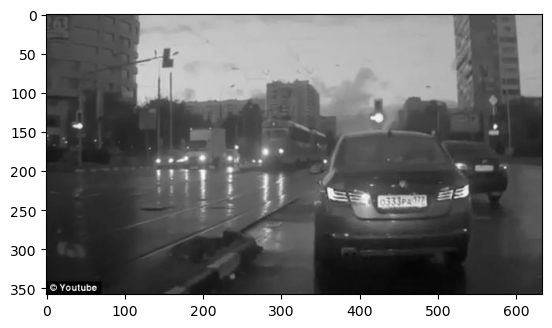

In [87]:
plt.imshow(plates,cmap="gray")